In [90]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import MeanShift, estimate_bandwidth

In [75]:
cords=pd.read_csv("D:/datafiles/checkins.csv",sep=";",dtype={'id':int,"user_id":int,"venue_id":int,"latitude":np.float64,"longitude":np.float64,"created_at":str})

In [78]:
cords.columns=cords.columns.map(lambda x: x.strip())

In [79]:
def my_strip(x):
    if type(x)==str:
        return x.strip() 

In [80]:
cords.latitude=cords.latitude.apply(lambda x: my_strip(x))
cords.longitude=cords.longitude.apply(lambda x: my_strip(x))

In [81]:
cords[["latitude","longitude"]]=cords[["latitude","longitude"]].apply(pd.to_numeric, errors='ignore')

In [83]:
cords=cords[cords["latitude"].notnull()]

In [84]:
cords.head()

,id,user_id,venue_id,latitude,longitude,created_at
1,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
3,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
7,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
9,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
10,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18


In [85]:
cords.describe()

,user_id,venue_id,latitude,longitude
count,3.966340e+05,3.966340e+05,396634.000000,396634.000000
mean,5.641349e+05,1.327559e+05,37.097070,-86.354065
std,4.865694e+05,2.287003e+05,8.778760,37.983677
min,1.000000e+00,1.000000e+00,-75.250973,-159.670833
25%,1.692900e+05,7.620000e+03,33.800745,-111.926052
50%,4.298200e+05,2.830400e+04,39.099275,-85.758456
75%,8.496470e+05,1.485520e+05,40.802071,-74.056530
max,2.153361e+06,1.143011e+06,78.218590,178.424240


In [86]:
cords.shape

(396634, 6)

In [87]:
X=cords.as_matrix(["latitude","longitude"])

In [142]:
X[:100000]

array([[  38.8951118,  -77.0363658],
       [  33.800745 ,  -84.41052  ],
       [  45.5234515, -122.6762071],
       ..., 
       [  29.7628844,  -95.3830615],
       [  32.802955 ,  -96.769923 ],
       [  37.7749295, -122.4194155]])

In [155]:
#bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100000)
ms = MeanShift(bandwidth=0.1)
ms.fit(X[:100000])

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [192]:
#x = np.array([1,1,1,2,2,2,5,25,1,1])
labels_df=pd.DataFrame({"labels_df":labels})

In [197]:
labels_df2=pd.DataFrame(labels_df.groupby("labels_df")["labels_df"].count())

In [203]:
labels_df2.head()

,count
labels_df,
0,12506
1,4692
2,3994
3,3363
4,3526


In [202]:
labels_df2.columns=["count"]

In [205]:
labels_df2=labels_df2.reset_index()

In [214]:
labels_df2=labels_df2[labels_df2["count"]>15]

In [156]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [215]:
cluster_centers=cluster_centers[labels_df2.labels_df]

In [157]:
labels

array([ 5,  7, 30, ..., 25, 19,  4], dtype=int64)

In [218]:
cluster_centers

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       ..., 
       [  41.61853175,  -88.44556818],
       [  38.65877915,  -76.8856871 ],
       [  39.2494686 ,  -77.1821271 ]])

In [159]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3230


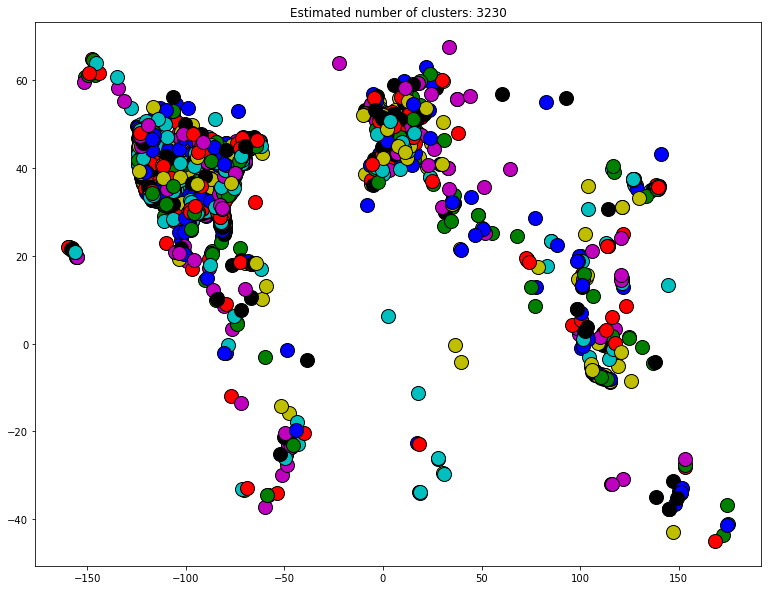

In [161]:
import matplotlib.pyplot as plt
from itertools import cycle

#plt.figure(1)
plt.figure(figsize=(13,10))
plt.dpi=100
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[:100000][my_members, 1], X[:100000][my_members, 0], col + '.')
    plt.plot(cluster_center[1], cluster_center[0], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [162]:
offices=pd.read_csv("D:/datafiles/offices.csv",sep=",")

In [163]:
offices.head(100)

,latitude,longitude
0,33.751277,-118.188740
1,25.867736,-80.324116
2,51.503016,-0.075479
3,52.378894,4.885084
4,39.366487,117.036146
5,-33.868457,151.205134


In [164]:
offices_m=offices.as_matrix()

In [219]:
offices_m

array([[  3.37512770e+01,  -1.18188740e+02],
       [  2.58677360e+01,  -8.03241160e+01],
       [  5.15030160e+01,  -7.54790000e-02],
       [  5.23788940e+01,   4.88508400e+00],
       [  3.93664870e+01,   1.17036146e+02],
       [ -3.38684570e+01,   1.51205134e+02]])

In [166]:
from math import sqrt

In [220]:
def dist_fun(x,y):
    return sqrt(((x[0]-y[0])**2)+((x[1]-y[1])**2))

In [231]:
dist=[]
mins={}
for i  in cluster_centers:
    for j in offices_m:
        dist.append(dist_fun(i,j))
    mins[(i[0],i[1])]=min(dist)
    dist=[]

In [235]:
min(mins, key=mins.get)

(-33.860630428571433, 151.20477592857145)

In [236]:
mins[(-33.860630428571433, 151.20477592857145)]

0.007834758163109155

In [222]:
dist_fun(cluster_centers[0],offices_m[0])

44.74257091784804

In [237]:
mins

{(-37.809054056521745, 144.96668138695651): 7.378793679664529,
 (-34.611995957692294, -58.371865357692322): 64.34049491523207,
 (-33.860630428571433, 151.20477592857145): 0.007834758163109155,
 (-33.425740640740756, -70.570739859259234): 60.09030469459146,
 (-33.050461900000009, -71.616451500000011): 59.55818554009286,
 (-23.549518346153803, -46.638218881196636): 59.806393402470455,
 (-22.903539300000009, -43.209586899999984): 61.28723818792244,
 (-8.6643629454545508, 115.21134018787885): 43.94086423933723,
 (-7.7974691846153847, 110.36603174230774): 47.63327814873746,
 (-7.2677153714285669, 112.74167326530616): 46.76577024789979,
 (-6.9131021012658307, 107.60774275949373): 47.230235602287564,
 (-6.3146981152542345, 106.81315175593215): 46.81111283497082,
 (-6.2474466, 107.1484521): 46.67330531605091,
 (-6.2127666563850035, 106.84465981237784): 46.7047615836499,
 (-6.1839662238095245, 106.62444716666666): 46.72523152955472,
 (-0.78927499999999995, 113.92132699999999): 40.27638662049272